In [18]:
from fastbook import *
from pathlib import Path
import os

In [19]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [34]:
car_models = 'mazda miata','toyota supra','audi quattro'
path = Path('cars')

if not path.exists():
    path.mkdir()
    for o in car_models:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [35]:
fns = get_image_files(path)
fns

(#441) [Path('cars/audi quattro/00000013.jpg'),Path('cars/audi quattro/00000087.jpg'),Path('cars/audi quattro/00000011.jpg'),Path('cars/audi quattro/00000135.jpg'),Path('cars/audi quattro/00000054.jpg'),Path('cars/audi quattro/00000128.jpg'),Path('cars/audi quattro/00000024.jpg'),Path('cars/audi quattro/00000006.jpg'),Path('cars/audi quattro/00000062.jpg'),Path('cars/audi quattro/00000126.jpg')...]

In [36]:
failed = verify_images(fns)
failed

(#4) [Path('cars/audi quattro/00000025.jpg'),Path('cars/audi quattro/00000143.jpg'),Path('cars/audi quattro/00000010.jpg'),Path('cars/mazda miata/00000141.jpg')]

In [37]:
failed.map(Path.unlink);

In [38]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [39]:
dls = cars.dataloaders(path)

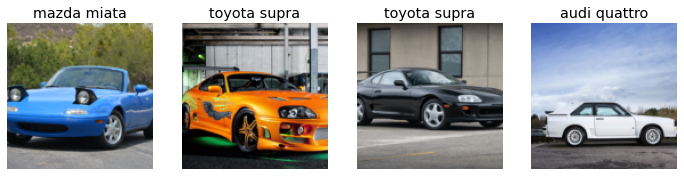

In [40]:
dls.valid.show_batch(max_n=4, nrows=1)

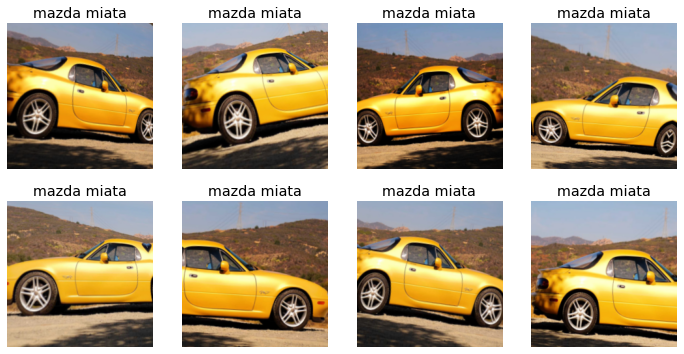

In [41]:
cars = cars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [42]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.881335,0.667225,0.333333,00:09


/home/casper/miniconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.946286,0.480911,0.172414,00:08
1,0.797706,0.435490,0.149425,00:09
2,0.647804,0.424480,0.103448,00:09
3,0.579454,0.409490,0.091954,00:09


/home/casper/miniconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/casper/miniconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/casper/miniconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/casper/miniconda3/envs/fastai/lib/python3.9/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


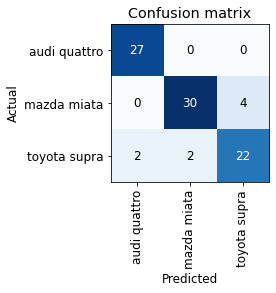

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

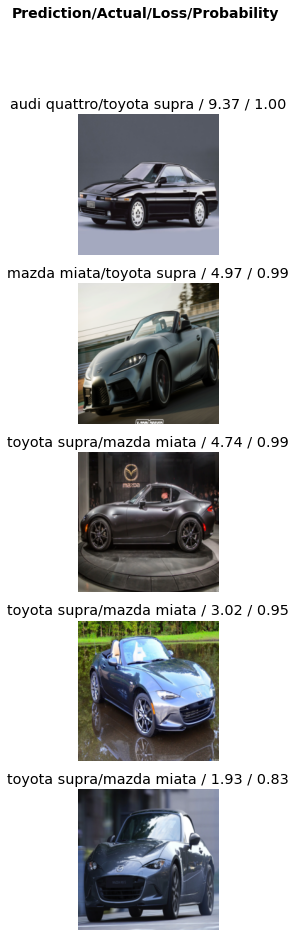

In [47]:
interp.plot_top_losses(5, nrows=5)

In [48]:
learn.export()